# Real Estate Sales in Melbourne
### The notebook of this project is an analysis of the database of property sales in Melbourne from 2016 to 2017. The features of the dataset includes Address, Property Type, Suburb, Method of Selling, Rooms, Price, Agent, Date of Sold, Distance from CBD, Land Size, Building Size and Number of Properties that exist in each suburb. The amount of data in this database has certain limitations, with less data available for the first quarter of 2016 and the fourth quarter of 2017. Despite the limitations above, other data volumes are very detailed and easy to analyze.
### For most stakeholders, the main concern is the price, so my first point is mainly to analyze which features will affect the housing price. 
Types: Unit,House and Townhouse.
* The price distribution of different property types.

location: With regions and suburbs.
* The price distribution of different location.

Rooms: With number of bedrooms,bathrooms and carports.
* The price distribution of number of rooms.

land size:
* The correlation between land size and property price.

According to the data, I predict that the property price is mainly affected by the type of property. House is the most expensive, townhouse is the second, and unit is the cheapest. Secondly, in the case of the same type of property, the suburb where the house is located is a key factor in determining the property price. Finally, when the conditions of the first two features are the same, what determines the property price is the number of rooms. Landsize is not a major factor in determining property prices.

### Secondly, I will further summarize the property sales in Melbourne from 2016 to 2017.
* Which property type have sold the most?
* Which sales method is easy to make deal？
* Which agent sold the most property?
* Trend of property price between 2016 and 2017.
* Which month sold the most in 2016 or 2017?

In [1]:
#import packages
import pandas as pd  
import numpy as np
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/DanYang/Desktop/melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## Data preprocessing

### I chose to separate the year and month of the date for the convenience of later analysis.

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Sold_year'] = pd.DatetimeIndex(df['Date']).year
df['Sold_month'] = pd.DatetimeIndex(df['Date']).month
df.drop(columns = ['Date'], inplace = True)

/Users/DanYang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/08/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/DanYang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14/05/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/DanYang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/DanYang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16

In [6]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Sold_year           0
Sold_month          0
dtype: int64

<AxesSubplot:xlabel='Car', ylabel='Count'>

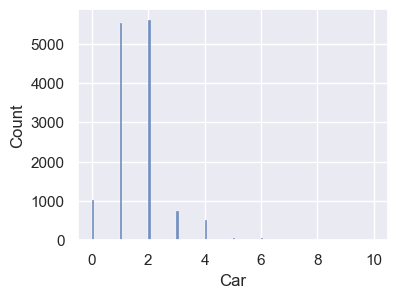

In [7]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(figsize=(4,3))
sns.histplot(df['Car'])

### Usually, unit has no parking space, so I choose 0 to fill null, while the parking space of house can be 1 or 2 without affecting data analysis, so I choose 1 to fill .

In [8]:
df.loc[(df['Car'].isna())& (df['Type']=='h'),'Car']= 1
df.loc[(df['Car'].isna())& (df['Type']=='u'),'Car']= 0

### Suburb and CouncilArea correspond one to one, so I create a dictionary to fill unknown CouncilArea with known relation.

In [9]:
df_Suburb = df.groupby(['Suburb','CouncilArea'])['Address'].count().reset_index(name='count')
dict_Suburb = dict([(i,[x]) for i, x in zip(df_Suburb.Suburb,df_Suburb.CouncilArea)])
def isNaN(string):
    return string != string
for r, row in enumerate (df['CouncilArea'].values):
    if isNaN(row) and df['Suburb'][r] in dict_Suburb :
        df['CouncilArea'][r] = dict_Suburb[df['Suburb'][r]]

/var/folders/77/cr3w0dnx3ld3wl3dh7zz4p_r0000gn/T/ipykernel_40410/719894256.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CouncilArea'][r] = dict_Suburb[df['Suburb'][r]]


### After filling the Car and CouncilArea, I chose 'unknown' to fill the remaining null because we didn't have any more relevant data.

In [10]:
df.fillna('unknown', inplace=True)
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Sold_year        0
Sold_month       0
dtype: int64

# Data Analytics

## Price analysis

### price distribution

<AxesSubplot:xlabel='Price', ylabel='Count'>

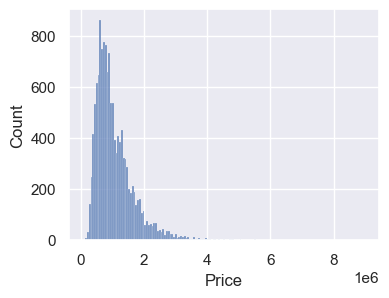

In [11]:
fig, axs = plt.subplots(figsize=(4,3))
sns.histplot(df['Price'])

### It can be seen from the figure above that there are few values greater than 3000000, so I cleared outlier selection for analysis of values less than 3000000.

<AxesSubplot:xlabel='Price', ylabel='Count'>

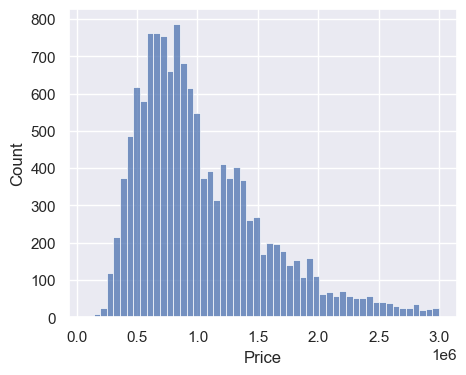

In [12]:
df_price = df.loc[df['Price'] <= 3000000]
fig, axs = plt.subplots(figsize=(5,4))
sns.histplot(df_price['Price'])



## The price distribution of different types.

### Types: Unit,House and Townhouse.

In [13]:
df_house=df_price[df_price['Type']=='h']
df_house['Price'].median()

1060000.0

In [14]:
df_townhouse=df_price[df_price['Type']=='t']
df_townhouse['Price'].median()

845500.0

In [15]:
df_unit=df_price[df_price['Type']=='u']
df_unit['Price'].median()

560000.0

<AxesSubplot:xlabel='Price', ylabel='Count'>

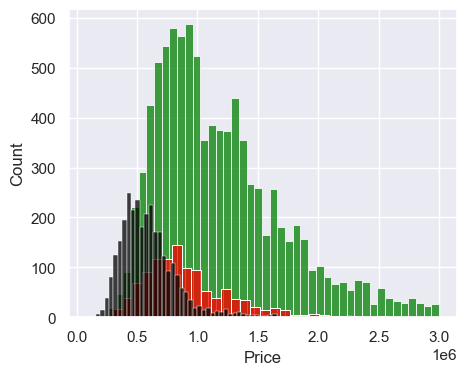

In [16]:
fig, axs = plt.subplots(figsize=(5,4))
sns.histplot(df_house['Price'],color = 'green')
sns.histplot(df_townhouse['Price'],color= 'red')
sns.histplot(df_unit['Price'],color = 'black')

### According to the histplot above , it can be seen that the property type is the key feature affecting the property price. From the median of different property types, it can be concluded that house is the most expensive, townhouse is the second,  and unit is the cheapest.




## The price distribution of different location.

### Region and price:

In [17]:
# number of Regions  
df['Regionname'].nunique()

8

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Northern Metropolitan'),
  Text(1, 0, 'Western Metropolitan'),
  Text(2, 0, 'Southern Metropolitan'),
  Text(3, 0, 'Eastern Metropolitan'),
  Text(4, 0, 'South-Eastern Metropolitan'),
  Text(5, 0, 'Eastern Victoria'),
  Text(6, 0, 'Northern Victoria'),
  Text(7, 0, 'Western Victoria')])

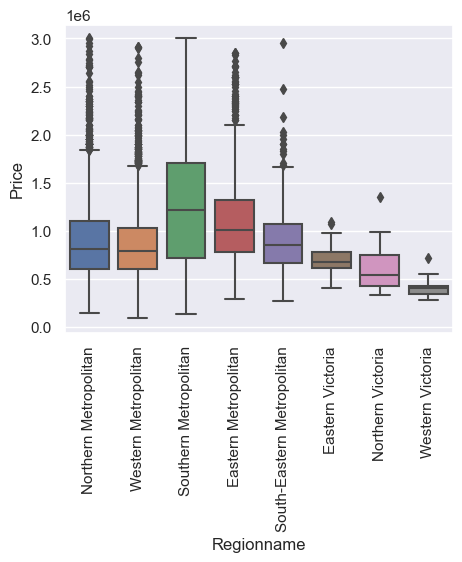

In [18]:
fig, axs = plt.subplots(figsize=(5, 4))
sns.boxplot(x="Regionname", y="Price", data=df_price)
plt.xticks(rotation = 90)

###  As can be seen from the figure above, the data of the first five regions in the eight regions are available, while the data of the last three regions are from Victoria and not within the scope of Melbourne, which has no reference value for our research on property price of Melbourne. Therefore, we do not need the data of the last three regions of Victoria. 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Northern Metropolitan'),
  Text(1, 0, 'Western Metropolitan'),
  Text(2, 0, 'Southern Metropolitan'),
  Text(3, 0, 'Eastern Metropolitan'),
  Text(4, 0, 'South-Eastern Metropolitan')])

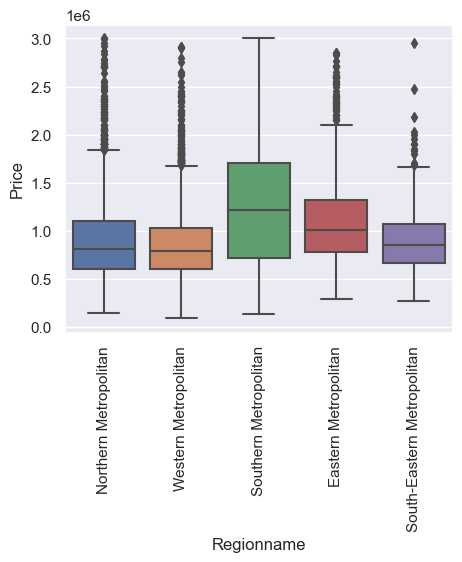

In [19]:
df_region = df.loc[df['Regionname'].isin(['Southern Metropolitan','Northern Metropolitan','Western Metropolitan','South-Eastern Metropolitan','Eastern Metropolitan'])]
fig, axs = plt.subplots(figsize=(5, 4))
sns.boxplot(x=(df_region["Regionname"]), y=(df_price['Price']))
plt.xticks(rotation = 90)

* Among the five regions of Melbourne, the property price of Southern Metropolitan is the highest, and that of Eastern Metropolitan is the second,and the other three regions have similar price.


### Next, I selected the region Southern Metropolitan with the highest price and the largest quantity to analyze the relationship between price and suburb.

### Suburb and price:

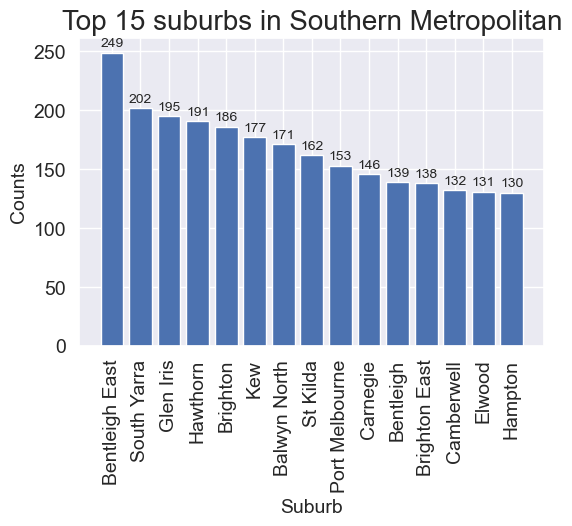

In [20]:
df_suburb_South= df[(df['Regionname']=='Southern Metropolitan')].groupby(['Suburb'])['Address'].count().reset_index(name='count')
df_suburb= df_suburb_South.sort_values(by= 'count',ascending=False).head(15)
plt.figure(figsize=(6,4))
plt.bar(df_suburb['Suburb'],df_suburb['count'],color='b')
plt.title('Top 15 suburbs in Southern Metropolitan', fontsize=20)
plt.xlabel('Suburb', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.tick_params(labelsize=14)
plt.xticks(rotation=90)
for a,b in zip(df_suburb['Suburb'],df_suburb['count']):
    plt.text(a, b+5, b, fontsize=10, ha='center')
plt.show()

### Next, let's take a look at the relationship between the top 15 suburbs and price. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

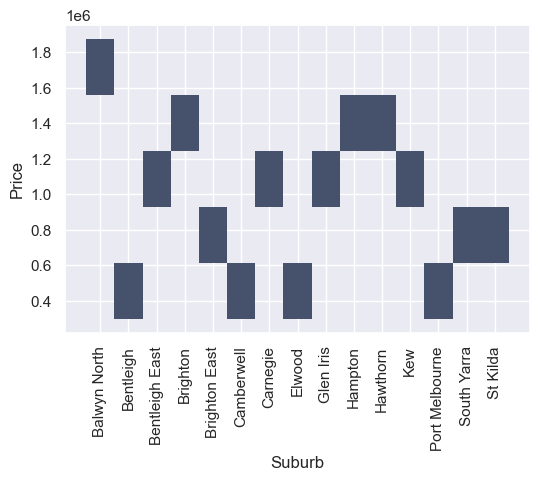

In [21]:
fig, axs = plt.subplots(figsize=(6, 4))
sns.histplot(x=df_suburb['Suburb'], y=df['Price'])
plt.xticks(rotation = 90)

* As can be seen from the picture above, prices do vary in different suburbs of the same region.

## The price distribution of number of rooms.
### In order to analyze the relationship between price and rooms, I selected Bentleigh East suburb with the highest sales volume in the Southern Metropolitan region.

In [22]:
df_ben = df[(df['Suburb']=='Bentleigh East')]
df_ben['Rooms'].unique()

array([2, 3, 1, 5, 4])

In [23]:
df_ben.groupby('Rooms')['Address'].count().reset_index(name='count')

,Rooms,count
0,1,3
1,2,36
2,3,139
3,4,62
4,5,9


<AxesSubplot:xlabel='Rooms', ylabel='Price'>

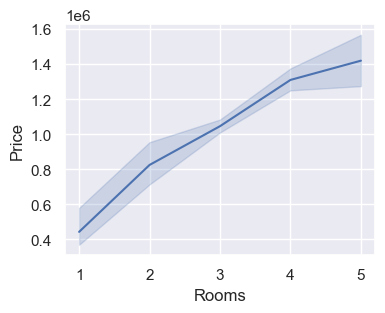

In [24]:
fig, axs = plt.subplots(figsize=(4, 3))
sns.lineplot(x="Rooms", y="Price", data=df_ben)

* According to the lineplot above, we can see that the number of rooms is positively correlated, and the higher the number of rooms, the higher the price.


## Next, we will analyze the relationship between Price and the number of bedrooms,bathrooms and carports.

<AxesSubplot:xlabel='Car', ylabel='Price'>

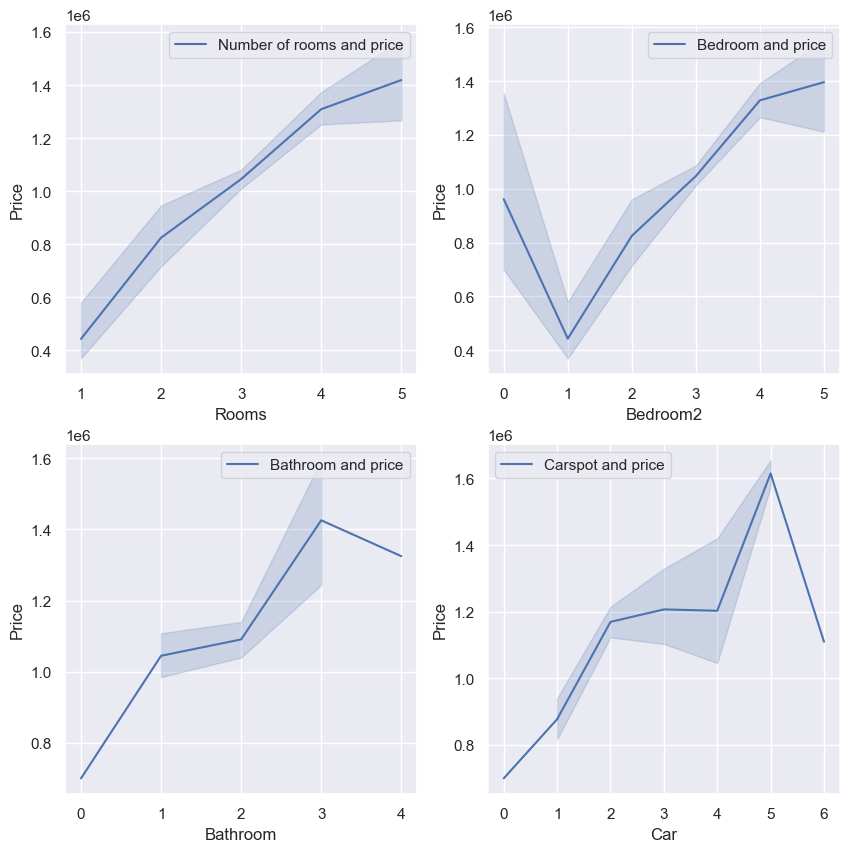

In [25]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
sns.lineplot(x="Rooms", y="Price", data=df_ben, label ='Number of rooms and price',ax = axs[0][0])
sns.lineplot(x="Bedroom2", y="Price", data=df_ben,label ='Bedroom and price',ax = axs[0][1])
sns.lineplot(x="Bathroom", y="Price", data=df_ben,label ='Bathroom and price',ax = axs[1][0])
sns.lineplot(x="Car", y="Price", data=df_ben,label ='Carspot and price',ax = axs[1][1])

### From the figure above, we can see that the data of number of bedrooms,bathrooms and carports are not accurate or abundant enough. In order to better analyze the relationship between the three and property price, I choose more accurate data for analysis.

<AxesSubplot:xlabel='Car', ylabel='Price'>

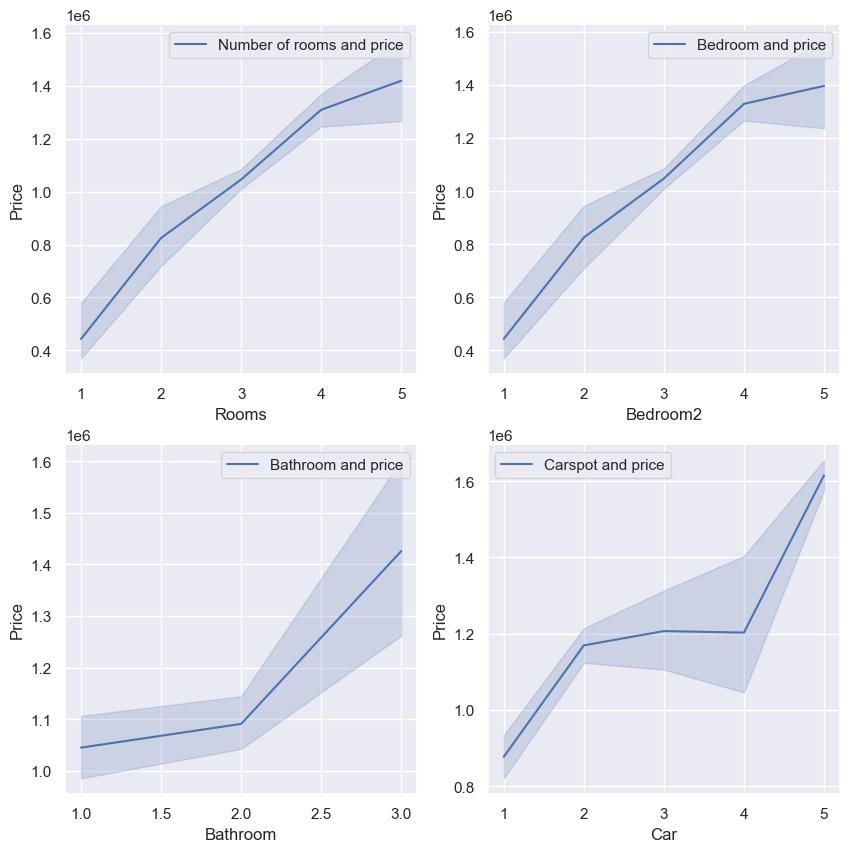

In [26]:
df_bedroom = df[df['Bedroom2']>=1]
df_bathroom = df.loc[df['Bathroom'].isin([1,2,3])]
df_car = df.loc[~df['Car'].isin([0,6])]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
sns.lineplot(x="Rooms", y="Price", data=df_ben, label ='Number of rooms and price',ax = axs[0][0])
sns.lineplot(x=df_bedroom["Bedroom2"], y="Price", data=df_ben,label ='Bedroom and price',ax = axs[0][1])
sns.lineplot(x=df_bathroom["Bathroom"], y="Price", data=df_ben,label ='Bathroom and price',ax = axs[1][0])
sns.lineplot(x=df_car["Car"], y="Price", data=df_ben,label ='Carspot and price',ax = axs[1][1])

* As can be seen from the chart above, the other three are also positively correlated with housing prices in general.

### The correlation between land size and property price.

<AxesSubplot:xlabel='Landsize', ylabel='Price'>

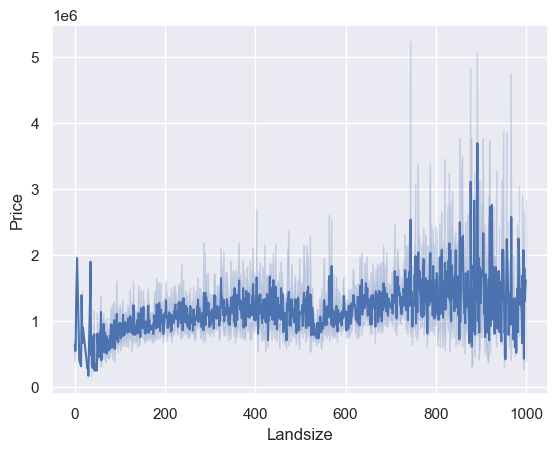

In [27]:
df_Landsize=df[df['Landsize']<1000]
sns.lineplot(x="Landsize", y="Price",data = df_Landsize)

* As can be seen from the figure above, although the property price fluctuates with the landsize, it is generally not the main factor affecting the price.

### Let's conclude the first part of the data analysis with a brief overview of the main findings.
### 1.The first thing that determines the property price is the property type: 
* Based on the median price of the property we can figure out that among the three types of Unit,House and Townhouse, house has the highest price, Townhouse is the second, and Unit is the cheapest and almost half of house price.
### 2.The location of the property will affect the price:
* Among the five regions of Melbourne, the property price of Southern Metropolitan is the highest, and that of Eastern Metropolitan is the second,and the other three regions have similar price.
* In the top 15 suburbs of Southern Metropolitan region, the Bentleigh East have the most sales and Balwyn North is the most expensive suburbs.
### 3.The number of rooms is positively correlated and the higher the number of rooms, the higher the price:
* In the same region,Bentleigh East,the number of bedrooms,bathrooms and carsports and property prices have the highest correlation.
### 4. The landsize not the main factor affecting the price.

##  Summary of part one:
* The property price is first related to the property type, house is the most expensive, unit is the cheapest. Secondly, it is related to the location of the property. Southern Metropolitan is the most expensive region, and Balwyn North within Southern Metropolitan is the most expensive suburb.Next, the number of rooms is related to the price. The more rooms, the more expensive the price. Finally,landsize is not the main factor determining the property price.

# Next,  I will further summarize the property sales in Melbourne from 2016 to 2017.

Question: Which types of property have sold the most?

Asnwer:

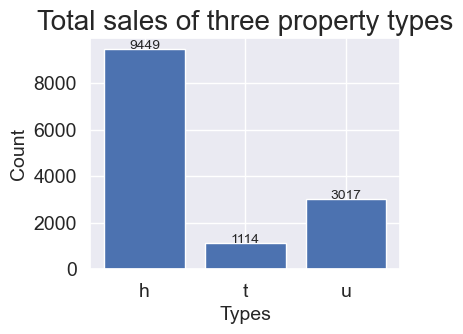

In [28]:
df_type_count=df.groupby('Type')['Suburb'].count().reset_index(name='count')
plt.figure(figsize=(4,3))
plt.bar(df_type_count['Type'],df_type_count['count'],color='b')
plt.title('Total sales of three property types', fontsize=20)
plt.xlabel('Types', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tick_params(labelsize=14)
plt.xticks(rotation=0)
for a,b in zip(df_type_count['Type'],df_type_count['count']):
    plt.text(a, b+5, b, fontsize=10, ha='center')
plt.show()

Question:Which sales method is easy to make deal？

Asnwer:

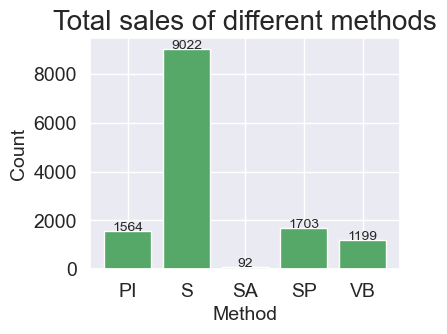

In [29]:
df_method_count=df.groupby('Method')['Address'].count().reset_index(name='count')
plt.figure(figsize=(4,3))
plt.bar(df_method_count['Method'],df_method_count['count'],color='g')
plt.title('Total sales of different methods', fontsize=20)
plt.xlabel('Method', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tick_params(labelsize=14)
plt.xticks(rotation=0)
for a,b in zip(df_method_count['Method'],df_method_count['count']):
    plt.text(a, b+5, b, fontsize=10, ha='center')
plt.show()

* PI - property passed in
* S - property sold
* SA - sold after auction
* SP - property sold prior
* VB - vendor bid

Question:Which agent sold the most property?

Asnwer:

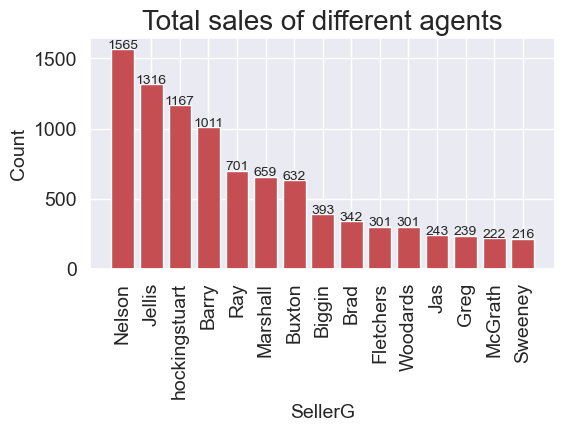

In [30]:
df_agent=df.groupby('SellerG')['SellerG'].count().reset_index(name='count')
df_agent_count= df_agent.sort_values(by= 'count',ascending=False).head(15)
plt.figure(figsize=(6,3))
plt.bar(df_agent_count['SellerG'],df_agent_count['count'],color='r')
plt.title('Total sales of different agents', fontsize=20)
plt.xlabel('SellerG', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tick_params(labelsize=14)
plt.xticks(rotation=90)
for a,b in zip(df_agent_count['SellerG'],df_agent_count['count']):
    plt.text(a, b+5, b, fontsize=10, ha='center')
plt.show()

Question:Trend of property price between 2016 and 2017.

Asnwer:

<AxesSubplot:xlabel='Sold_year', ylabel='Price'>

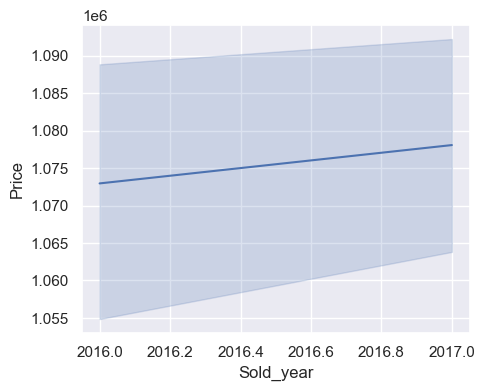

In [31]:
fig, axs = plt.subplots(figsize=(5, 4))
sns.lineplot(x="Sold_year", y="Price",data = df)

Question: Which month sold the most in 2016 or 2017?

Asnwer:

<AxesSubplot:xlabel='Sold_month', ylabel='count'>

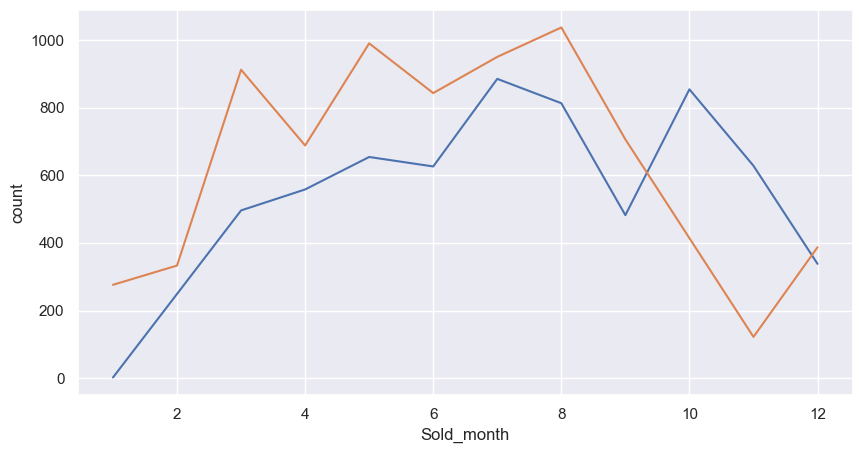

In [32]:
df_2016_count = df[df['Sold_year'] == 2016].groupby('Sold_month')['Sold_month'].count().reset_index(name='count')
df_2017_count = df[df['Sold_year'] == 2017].groupby('Sold_month')['Sold_month'].count().reset_index(name='count')
fig, axs = plt.subplots(figsize=(10, 5))
sns.lineplot(x="Sold_month", y="count", data=df_2016_count)
sns.lineplot(x="Sold_month", y="count", data=df_2017_count)